In [1]:
%load_ext autoreload
%autoreload 2

#standard imports
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

#rl book imports
import rl
from rl.markov_decision_process import MarkovDecisionProcess
from rl.markov_process import State, MarkovProcess, NonTerminal, Terminal

from typing import (Callable, Dict, Generic, Iterator, Iterable, List,
                    Mapping, Optional, Sequence, Tuple, TypeVar, overload)


from rl.distribution import Categorical, Distribution, Constant, Choose
from rl.policy import Policy
from rl.monte_carlo import epsilon_greedy_policy, greedy_policy_from_qvf, glie_mc_control, mc_prediction
from rl.function_approx import LinearFunctionApprox, AdamGradient
from rl.td import glie_sarsa, q_learning
from rl.td_lambda import td_lambda_prediction


#custom imports 
import utils as u
import data as dat
import mdp_agent as ag
import baseline_policies as bp
import q_plots as qp
import backtest as btest
import v_predictor as v_true
import v_convergence as v_conv 
import v_plots2 as v2
import pickle
import SignalExtractor as signal

# Load residuals

In [2]:
with open("FX_Residuals/residuals_PCA_3F_6_2.pkl","rb") as f:
    fx_data = pickle.load(f)

In [101]:
def scatter_plot_with_stats(x, y,title=None):
    # Align series on their index
    x_aligned, y_aligned = x.align(y, join='inner')
    
    # Calculate correlation
    correlation = x_aligned.corr(y_aligned)
    
    # Calculate hit ratio
    hit_ratio = ((np.sign(x_aligned) == np.sign(y_aligned)).sum()) / len(x_aligned)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_aligned, y_aligned, alpha=0.7)
    plt.title(f'Correlation: {correlation:.2f}, Hit Ratio: {hit_ratio:.2%} '+(title if title is not None else ""))
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.grid(True)
    plt.show()

    return correlation, hit_ratio

In [ ]:
ccy = 

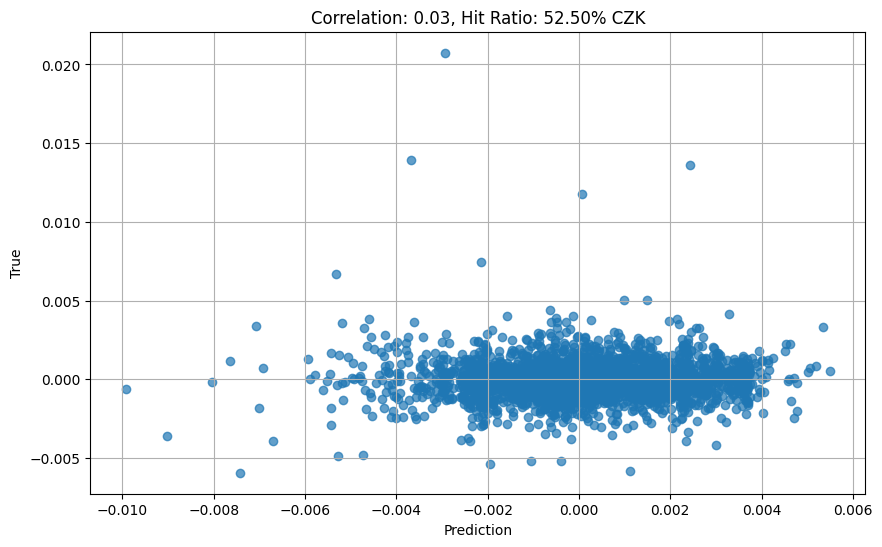

(0.027116068214876055, 0.525)

In [106]:
ccy = "CZK"
scatter_plot_with_stats(pred1[ccy],fx_data[ccy].shift(-1),title =ccy)

# Load predictions

In [27]:
with open("pred_1.pkl","rb") as f:
    pred1 = pickle.load(f)

In [86]:
u.multi_plot_compare(pred1.dropna(), fx_data.dropna().shift(-1),h=1000,w=1500)